In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', delimiter=',')

/Users/trevohearn/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (171) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Quickly check to see the size of our DF, both rows and columns
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34545 entries, 0 to 34544
Columns: 359 entries, Unnamed: 0 to _AIDTST3
dtypes: float64(352), int64(6), object(1)
memory usage: 94.6+ MB


,Unnamed: 0,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
1,49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
2,49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
3,49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
4,49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34540,303774,36.0,5.0,5152017,5,15,2017,1200.0,2017012245,2.017012e+09,...,3.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
34541,303775,36.0,6.0,6252017,6,25,2017,1200.0,2017012246,2.017012e+09,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
34542,303776,36.0,7.0,7212017,7,21,2017,1200.0,2017012247,2.017012e+09,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
34543,303777,36.0,7.0,7202017,7,20,2017,1200.0,2017012248,2.017012e+09,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0


In [4]:
df.shape
df['_STATE'].unique()

array([ 9., 34., 36.])

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [5]:
# your code here
#NJ = 34
#CT = 9
#NY = 36
df['_STATE'] = df['_STATE'].astype('int32')
df
#df2 = df.set_index('_STATE')#.reset_index()
df['_STATE'].unique() #array([9,34,36])

#already set to only include the states in the tristate area

array([ 9, 34, 36])

Now check to see how large our subset df.

In [6]:
# your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34545 entries, 0 to 34544
Columns: 359 entries, Unnamed: 0 to _AIDTST3
dtypes: float64(351), int32(1), int64(6), object(1)
memory usage: 94.5+ MB


**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code. 

In [7]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [45]:
#your code here
df['PHYSHLTH'].isna().unique()#check for nan #0 days sick
df.dropna(subset=['PHYSHLTH'], inplace=True)
df['PHYSHLTH'] = df['PHYSHLTH'].astype('int64')
df['PHYSHLTH'] = df['PHYSHLTH'].replace(to_replace=88, value= 0) #0 days sick
df['PHYSHLTH'] = df['PHYSHLTH'].replace(to_replace=77, value= -1) #not sure
df['PHYSHLTH'] = df['PHYSHLTH'].replace(to_replace=99, value= -1) #refused
#df.drop(subset='PHYSHLTH')


#another way to integrate bad values
#mean = df['PHYSHLTH'].mean()
#df['PHYSHLTH'] = df['PHYSHLTH'].replace(to_replace=77, value=int(mean)) #
#df['PHYSHLTH'] = df['PHYSHLTH'].replace(to_replace=99, value=int(mean)) #
df['PHYSHLTH'].unique()

array([ 0,  2, 28,  5, 30,  4,  3, 15, 29,  7, 10, 14,  6,  1,  8, 25, 20,
       12, 18, 27, 21, 19, 22,  9, 13, 17, 11, 16, 24, 26, 23])

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a gprah shows the histogram of the data.

(array([2.1294e+04, 1.5380e+03, 1.9930e+03, 1.1870e+03, 6.2200e+02,
        1.8900e+03, 1.8700e+02, 6.4100e+02, 9.9000e+01, 1.5000e+01,
        7.5100e+02, 8.0000e+00, 6.9000e+01, 1.0000e+01, 3.2600e+02,
        6.4000e+02, 1.6000e+01, 1.5000e+01, 1.9000e+01, 1.0000e+01,
        4.0200e+02, 7.0000e+01, 1.2000e+01, 4.0000e+00, 7.0000e+00,
        1.5900e+02, 7.0000e+00, 2.2000e+01, 5.7000e+01, 3.5000e+01,
        2.4380e+03]),
 array([ 0.        ,  0.96774194,  1.93548387,  2.90322581,  3.87096774,
         4.83870968,  5.80645161,  6.77419355,  7.74193548,  8.70967742,
         9.67741935, 10.64516129, 11.61290323, 12.58064516, 13.5483871 ,
        14.51612903, 15.48387097, 16.4516129 , 17.41935484, 18.38709677,
        19.35483871, 20.32258065, 21.29032258, 22.25806452, 23.22580645,
        24.19354839, 25.16129032, 26.12903226, 27.09677419, 28.06451613,
        29.03225806, 30.        ]),
 <a list of 31 Patch objects>)

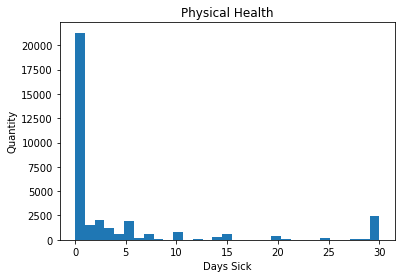

In [49]:
l = len(df['PHYSHLTH'].unique())
plt.title("Physical Health")
plt.xlabel("Days Sick")
plt.ylabel('Quantity')
plt.hist(df['PHYSHLTH'], bins = l)

(array([4718., 2699.,  755.,  828.,  976.,   50.,  482.,   23.,  188.,
        2530.]),
 array([ 1. ,  3.9,  6.8,  9.7, 12.6, 15.5, 18.4, 21.3, 24.2, 27.1, 30. ]),
 <a list of 10 Patch objects>)

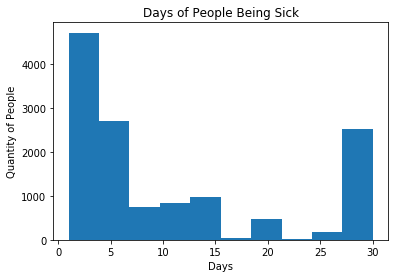

In [51]:
# graphic showing those descriptive stats
#df['SICK'] = df['PHYSHLTH'].apply(lambda x: x != 0, df['PHYSHLTH'])
df['SICK'] = df['PHYSHLTH'][df['PHYSHLTH'] != 0 ]
df['SICK'].describe()
df['SICK']
plt.title('Days of People Being Sick')
plt.xlabel("Days")
plt.ylabel("Quantity of People")
plt.hist(df['SICK'])
#plt.show()

/Users/trevohearn/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/trevohearn/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([4718., 2699.,  755.,  828.,  976.,   50.,  482.,   23.,  188.,
        2530.]),
 array([ 1. ,  3.9,  6.8,  9.7, 12.6, 15.5, 18.4, 21.3, 24.2, 27.1, 30. ]),
 <a list of 10 Patch objects>)

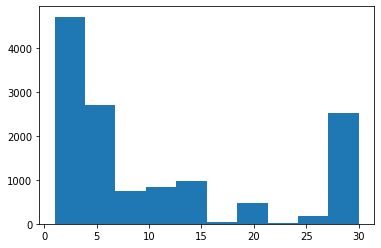

In [11]:
# graphic showing the distribution of data
plt.hist(df['SICK'])

## 3. Generate a graphic that compares the average number of sick days for each state. 

<BarContainer object of 3 artists>

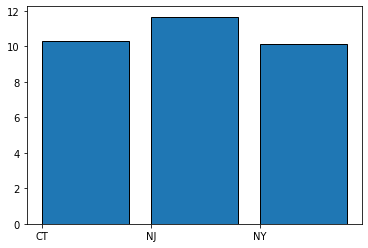

In [12]:
# code to calculate the average number of sick days by state

#NJ = 34
#CT = 9
#NY = 36

#grp1 = df.groupby('_STATE')['_STATE'].mean().sort_values('')
#type(grp_state)
grp_avgsickdays = df.groupby('_STATE')['SICK'].mean()
grp_avgsickdays
plt.bar(x = ['CT', 'NJ', 'NY'], height = grp_avgsickdays.values, align='edge', edgecolor='black' )
#grp = df.groupby('_STATE').mean()
#grp
#first_state = grp_state[df['_STATE'] == 9]
#first_state
#grp_state
#plt.hist(grp_state, edgecolor='black')
#plt.hist(grp_state = df.groupby('_STATE')['SICK'].mean())

In [13]:
# code to graph those averages using matplotlib
#above

## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [14]:
# code to create new colum for chronically sick
#defining chronically sick
#any number one deviation above the mean = ~12.52
df['PHYSHLTH'].describe()
# count    34545.000000
# mean         4.106470
# std          8.415507
# min          0.000000
# 25%          0.000000
# 50%          0.000000
# 75%          3.000000
# max         30.000000

#get group of ppl[123][123]
df['SICK_CHRONIC'] = df['PHYSHLTH'][df['PHYSHLTH'] > 12]
ppl_chronically_sick = df['SICK_CHRONIC'].value_counts().values.sum() #4249 people chronically sick
ppl_total = df['_STATE'].value_counts().values.sum() #34535 total people
ppl_chronically_sick / ppl_total  #0.122998 ~12% chronically sick
#grp_chronic = df.groupby('_STATE')['SICK_CHRONIC']
df

,Unnamed: 0,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,...,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,SICK,SICK_CHRONIC
0,49938,9,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,...,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN
1,49939,9,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,...,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0,NaN,NaN
2,49940,9,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,...,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0,2.0,NaN
3,49941,9,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,...,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN
4,49942,9,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,...,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34540,303774,36,5.0,5152017,5,15,2017,1200.0,2017012245,2.017012e+09,...,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN
34541,303775,36,6.0,6252017,6,25,2017,1200.0,2017012246,2.017012e+09,...,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN
34542,303776,36,7.0,7212017,7,21,2017,1200.0,2017012247,2.017012e+09,...,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0,6.0,NaN
34543,303777,36,7.0,7202017,7,20,2017,1200.0,2017012248,2.017012e+09,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN,NaN


## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [15]:
# code to calculate averages per state
df['SICK_CHRONIC'].value_counts()
totalsick = df['SICK_CHRONIC'].value_counts().sum() #total ppl sick
df['SICK_CHRONIC_BOOL'] = df['SICK_CHRONIC'][df['SICK_CHRONIC'] >= 0] * 0 + 1 # 1 if chronically sick

grp_ttlsickbystate = df.groupby('_STATE')['SICK_CHRONIC_BOOL'].sum()
grp_avgsickbystate = grp_ttlsickbystate / totalsick
grp_ttlsickbystate
#grp_avgsickbystate

#df['PHYSHLTH'] = df['PHYSHLTH'].replace(to_replace=77, value=int(mean))

_STATE
9     1174.0
34    1569.0
36    1506.0
Name: SICK_CHRONIC_BOOL, dtype: float64

<BarContainer object of 3 artists>

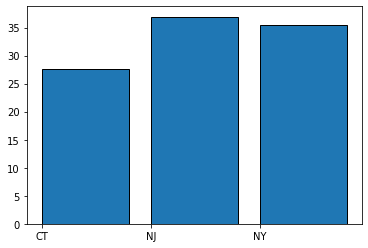

In [16]:
# create graphic to compare chronically sick by state
plt.bar(x = ['CT', 'NJ', 'NY'], height = grp_avgsickbystate * 100, align='edge', edgecolor='black' )

## 6. Independent Variables (categorical)

Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [17]:
#SMOKDAY2 Q=Do you now smoke cigarettes every day, some or not
#1 : EVERY DAY
#2 : SOME DAYS
#3 : NOT AT ALL (SECTION 9.04 LASTSMK2)
#.      last time smoked
#    if (df['SMOKDAY2'] == 3): 
#.        CHECK ROWS df['LASTSMK2'] == 1 (WITHIN LAST MONTH) ->SMOKER
#                                   == 2 (WITHIN 3 MONTHS)   ->SMOKER
#                                   == 3 (WITHIN 6 MONTHS)   ->SMOKER
#                                   == 4 (WITHIN A YEAR)     ->SMOKER
#.        CLASSIFY ABOVE AS SMOKERS
#                                   5 >= X <= 8 (OVER A YEAR TO NEVER) -> 0
#7 : DON'T KNOW NOT SURE (SECTION 9.05 USENOW3)
##    if df['SMOKDAY2'] == 7 or df['SMOKDAY2'] == 9:
#.        CHECK ROWS df['USENOW3'] == 1 (EVERYDAY) -> SMOKER
#                                   == 2 (SOME)    -> SMOKER
#                                   == 3 (NOT AT ALL) -> 0
#                                   == 7 (UNSURE) -> NAN
#                                   == 9 (REFUSED) ->

   
#9 : REFUSED (SECTION 9.05 USENOW3)
#.             ABOVE
#SECTION 9.04 HOW LONG SINCE YOU LAST SMOKED
#SECTION 9.05 SMOKELESS TOBACCO
#df['SMOKDAY2'][df['SMOKDAY2'] == 3] #should be fine its like every other day 

df_maysmoke_never = df[df['SMOKDAY2'] == 7][df['USENOW3'] == 3]


#df['test'] = df['SMOKDAY2'] - df_maysmoke_never['SMOKDAY2'] 
#df['test'] = df['SMOKDAY2'].map(lambda x : x - df_maysmoke_never['SMOKDAY2'][x] )
#df['test']
#groupby()[].apply(agg()
# people that maybe smoke and maybe dip
#df['SMOKDAY2'] = df[df['SMOKDAY2'] == 7 and (df['USENOW3'] == 1 or df['USENOW3'] == 2)] = 
#grp_smoking = df.groupby('_STATE')[['SMOKDAY2', 'LASTSMK2', 'USENOW3']].sum()
#grp_smoking
#df['SMOKERS'] = df['SMOKDAY2'].
#NaN values did not answer question, don't include in data

#possible cross -> healthy people that smoke
#plt.hist(df['SMOKDAY2'])
#df['PHYSHLTH']


/Users/trevohearn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


## 7. Independent Variables (continuous):

Now let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

## 8. Additional variables: Choose two additional survey items you would like to investigate do steps  6 or 7 for those variables.

In [18]:
# your code here

## 9. Based on your initial data exploration, what are some hypotheses of what affects a person's health that you would like to further investigate?

Type out your initial hyptotheses below:

1. 

2. 

3.  

## Bonus: Create some cool graphics.  